In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:

files = [file for file in os.listdir('C:\\Users\BRAKAY\\Desktop\\data science\\sales')]
for file in files:
    print(file)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [8]:
files = [file for file in os.listdir('C:\\Users\BRAKAY\\Desktop\\data science\\sales')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('C:\\Users\BRAKAY\\Desktop\\data science\\sales\\'+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv('datafile.csv', index = False)    

In [11]:
dataset = pd.read_csv('datafile.csv')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
dataset.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### cleaning of the data

In [12]:
dataset = dataset.dropna(how ='all')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
dataset = dataset[dataset['Order Date'].str[0:2] != 'Or']

### convert columns to correct data type

In [14]:
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'])
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'])
dataset.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### add the month column to our table


In [20]:
dataset['Month']=dataset['Order Date'].str[0:2]
dataset['Month']=dataset['Month'].astype('int32')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


### Extract the city name from the purchase Address and add it as  a column 

In [40]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
dataset['City'] = dataset['Purchase Address'].apply(lambda x:  get_city(x) + ' (' + get_state(x)+')')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


### Best month of sale

In [21]:
dataset['sale']= dataset['Quantity Ordered']* dataset['Price Each']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sale,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [22]:
result = dataset.groupby('Month').sum()
result

,Quantity Ordered,Price Each,sale
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


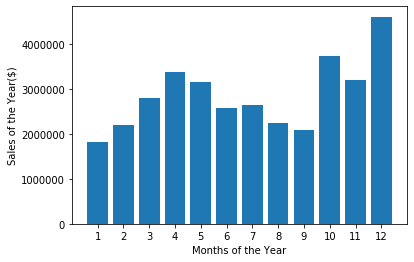

In [23]:
months = range(1,13)
plt.bar(months, result['sale'])
plt.xticks(months)
plt.ylabel('Sales of the Year($)')
plt.xlabel('Months of the Year')
plt.show()

### which city has the best or most sale?

In [42]:
result = dataset.groupby('City').sum()
result

,Quantity Ordered,Price Each,sale,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


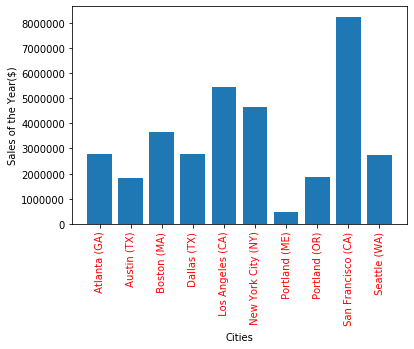

In [47]:
cities= [city for city,df in dataset.groupby('City')]
plt.bar(cities, result['sale'])
plt.xticks(cities, rotation ='vertical', size=10, color ='red')
plt.ylabel('Sales of the Year($)')
plt.xlabel('Cities')
plt.show()

### Most product sold 

In [48]:
result = dataset.groupby('Product').sum()
result

,Quantity Ordered,Price Each,sale,Month
Product,,,,
20in Monitor,4129,451068.99,454148.71,29336
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440
27in FHD Monitor,7550,1125974.93,1132424.50,52558
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304
AA Batteries (4-pack),27635,79015.68,106118.40,145558
AAA Batteries (4-pack),31017,61716.59,92740.83,146370
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113
Flatscreen TV,4819,1440000.00,1445700.00,34224


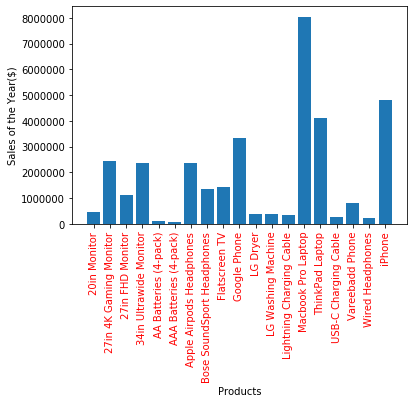

In [50]:
products= [product for product,df in dataset.groupby('Product')]
plt.bar(products, result['sale'])
plt.xticks(products, rotation ='vertical', size=10, color ='red')
plt.ylabel('Sales of the Year($)')
plt.xlabel('Products')
plt.show()